<a href="https://colab.research.google.com/github/jneey2000/ML/blob/main/Cross_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

X,y = datasets.load_iris(return_X_y=True)
X.shape, y.shape

((150, 4), (150,))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [7]:
X_train.shape, y_train.shape

((105, 4), (105,))

In [28]:
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)

In [10]:
clf.score(X_test, y_test)

0.9777777777777777

In [21]:
from google.colab import drive

In [22]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
from IPython.display import Image

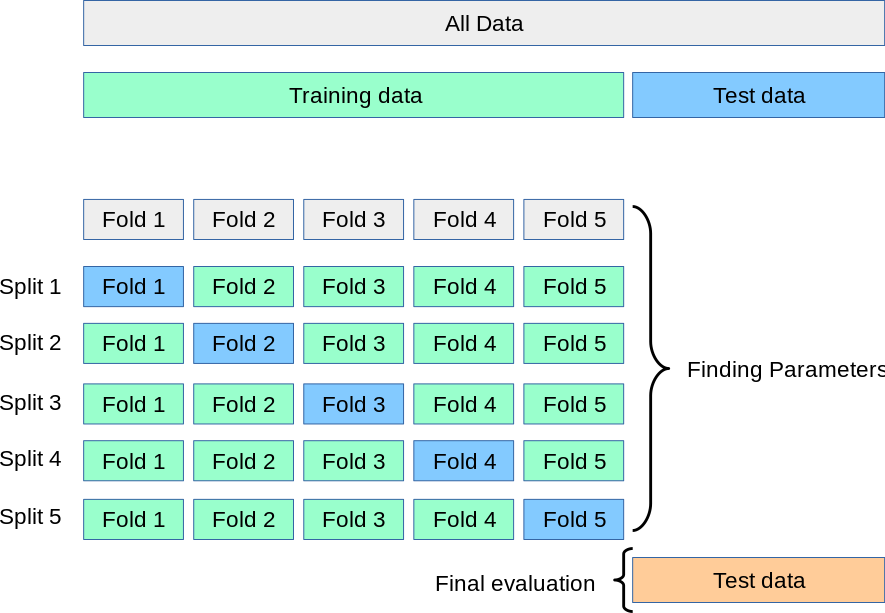

In [25]:
from IPython.display import Image
Image("/content/drive/MyDrive/2025/2025_01_ML/week6/images/cross_validation.png")

In [31]:
from sklearn.model_selection import cross_val_score

clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [32]:
# 평균 점수와 표준편차를 계산해 봅시다.
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.98 accuracy with a standard deviation of 0.02


In [33]:
import matplotlib.pyplot as plt
import matplotlib

# data load

iris = datasets.load_iris()

print('iris label \n{}'.format(iris.target))

print('''iris label's bin \n{}'''.format(np.bincount(iris.target)))

iris label 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris label's bin 
[50 50 50]


In [34]:
!pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 25.4 MB/s eta 0:00:00


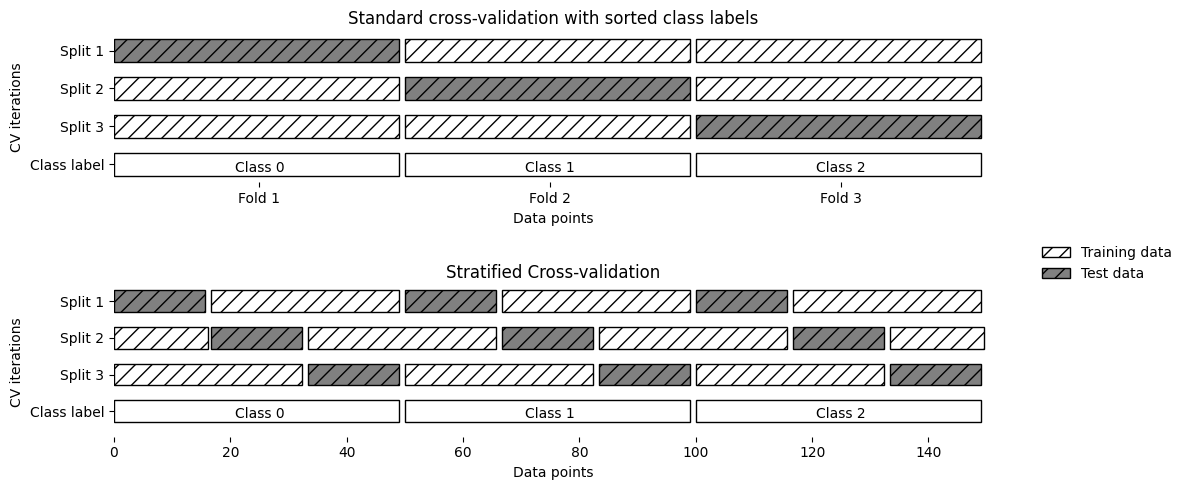

In [35]:
import mglearn

mglearn.plots.plot_stratified_cross_validation()

plt.show()

In [36]:
import pandas as pd

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

,count
label,
0,50
1,50
2,50


In [38]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5) #KFold 객체 생성

for n in [3,5]:
  kfold = KFold(n_splits=n) #KFold 객체 생성
  score = cross_val_score(clf, X, y, cv=kfold)
  print('n_splits={}, cross validation score: {}'.format(n, score))

n_splits=3, cross validation score: [0. 0. 0.]
n_splits=5, cross validation score: [1.         1.         0.86666667 1.         0.86666667]


In [42]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3) #StratifiedKFold 객체 생성
n_iter=0

#data split, StratifiedKfold using
for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('## cross validation: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## cross validation: 1
학습 레이블 데이터 분포:
 label
2    34
0    33
1    33
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
0    17
1    17
2    16
Name: count, dtype: int64
## cross validation: 2
학습 레이블 데이터 분포:
 label
1    34
0    33
2    33
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
0    17
2    17
1    16
Name: count, dtype: int64
## cross validation: 3
학습 레이블 데이터 분포:
 label
0    34
1    33
2    33
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
1    17
2    17
0    16
Name: count, dtype: int64


In [43]:
from sklearn.metrics import accuracy_score

skf = StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy = []

features = iris.data
label = iris.target

# StratifiedKFold의 split() 호출시 반드시 레이블 데이터 세트도 추가 입력해 주어야 함
for train_index, test_index in skf.split(features, label):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]

    # 학습 및 예측
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)

    # 반복 시 마다 정확도 측정
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]

    print('\n#{0} cross validation score : {1}, training data size : {2}, validation data size : {3}'.format(n_iter, accuracy, train_size, test_size))
    print('#{0} validation index : {1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)

# 교차 검증별 정확도 및 평균 정확도 계산
print('\n## cross validation score :', np.round(cv_accuracy, 4))
print('## average cross validation score :', np.mean(cv_accuracy))


#1 cross validation score : 1.0, training data size : 100, validation data size : 50
#1 validation index : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 cross validation score : 1.0, training data size : 100, validation data size : 50
#2 validation index : [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 cross validation score : 0.98, training data size : 100, validation data size : 50
#3 validation index : [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## cross validation score : [1.   1.   0.98]
## average cross 

In [44]:
for n in [3, 5]:
    kfold = KFold(n_splits=n, shuffle=True, random_state=0) # shuffle = True 로 해줌
    scores = cross_val_score(clf, X, y, cv=kfold)

    print('n_splits={}, cross validation score: {}'.format(n, scores))
    print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

n_splits=3, cross validation score: [0.98 0.98 0.98]
0.98 accuracy with a standard deviation of 0.00
n_splits=5, cross validation score: [1.         0.96666667 1.         1.         0.93333333]
0.98 accuracy with a standard deviation of 0.03


## 실습
이번에는, breast cancer 데이터셋을 활용해 실습해 봅시다. breast cancer 데이터셋은 클래스간에 불균형이 있습니다.

데이터셋은 breast cancer를 활용하되, 분류 모델은 자유롭게 선택하세요.

k-fold 방식(데이터 shuffle하지 않고, 클래스 간 균형도 맞추지 않았을 때)과 stratified k-fold(클래스 간 균형을 맞췄을 때) 방식의 성능을 비교해 보세요.

참고로, cross_val_score(estimator, x, y =None, scoring=None, cv=None) 방식은 cv 파라미터에 intager 값을 넣게 되면 자동으로 stratified k-fold 방식을 사용합니다.


1단계 : 데이터 불러오기

In [45]:
from sklearn.datasets import load_breast_cancer

bc = load_breast_cancer()
X = bc.data
y = bc.target


2단계 : 분류모델 정의 (decisionTreeClassifier)

In [47]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

3단계 : KFold 방식

In [50]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=5, shuffle=False)
kf_scores = cross_val_score(clf, X, y, cv=kf)

print("KFold 정확도 : ", kf_scores)
print("KFold 평균 정확도", kf_scores.mean())

KFold 정확도 :  [0.86842105 0.9122807  0.96491228 0.95614035 0.85840708]
KFold 평균 정확도 0.912032293122186


4단계 : StratifiedKFold방식 (클래스 비율 고려)

In [52]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=False)
skf_scores = cross_val_score(clf, X, y, cv=skf)

print("StratifiedKFold 정확도 : ", skf_scores)
print("StratifiedKFold 평균 정확도", skf_scores.mean())

StratifiedKFold 정확도 :  [0.9122807  0.90350877 0.92982456 0.95614035 0.88495575]
StratifiedKFold 평균 정확도 0.9173420276354604


KFold 평균 정확도 : 91.20%
StratifiedKFold 평균 정확도 : 91.73%

즉. StratifiedKFold가 더 일관되고 안정적인 평가가 되는 것을 확인함.